Using the sink test case that I wrote, see if I can get one sink in the center, right now this is in ramses/ but since I messed with some stuff in pm/ and its causing 

probably because i took out the safety precautions in npartmax 

Line 5 is bad...., we alreadyy know the npartmax fix now its in amr_params , so lets do that 

Weird this is stil giving me the same erorr 

In [2]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


In [4]:
cat output_00002/sink_00002.info

 Number of sink =            1
        Id       Mass(Msol)             x                y                z               vx               vy               vz      
         1    0.2542467E-14    0.5698271E+01    0.5698271E+01    0.4414062E+01   -0.1546532E-02   -0.1546532E-02    0.1018044E-02


In [5]:
cat output_00003/sink_00003.info

 Number of sink =            2
        Id       Mass(Msol)             x                y                z               vx               vy               vz      
         1    0.4449317E-14    0.5689862E+01    0.5689862E+01    0.4415175E+01    0.1246377E-01    0.1246377E-01   -0.3438469E-02
         2    0.2542467E-14    0.4414062E+01    0.5698271E+01    0.5698271E+01    0.1018069E-02   -0.1550985E-02   -0.1550985E-02


In [6]:
import yt

In [12]:
yt.funcs.mylog.setLevel(50)

In [14]:
def plot_time_slice(physical_quantity,timestep,text="",title="",zoom_factor="",grid=False,save=False):
    ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    slc = yt.SlicePlot(ds, "z",physical_quantity)
    slc.set_axes_unit('pc')
    if zoom_factor!="":
        slc.zoom(zoom_factor)
    slc.set_cmap(physical_quantity,"rainbow")
    slc.set_font_size(20)
    if title!="":
    	slc.annotate_title(title)
    if text!="":
	slc.annotate_text((0.1, 0.1),text, coord_system='axis')	
    slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
    slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
    slc.annotate_velocity()
    slc.annotate_particles((0.01, 'pc'))
    if(grid): 
	slc.annotate_grids()
    if (save):
       name  =str(timestep)#physical_quantity[:3]+str(timestep)
       slc.save(name)
    else:
       slc.show()


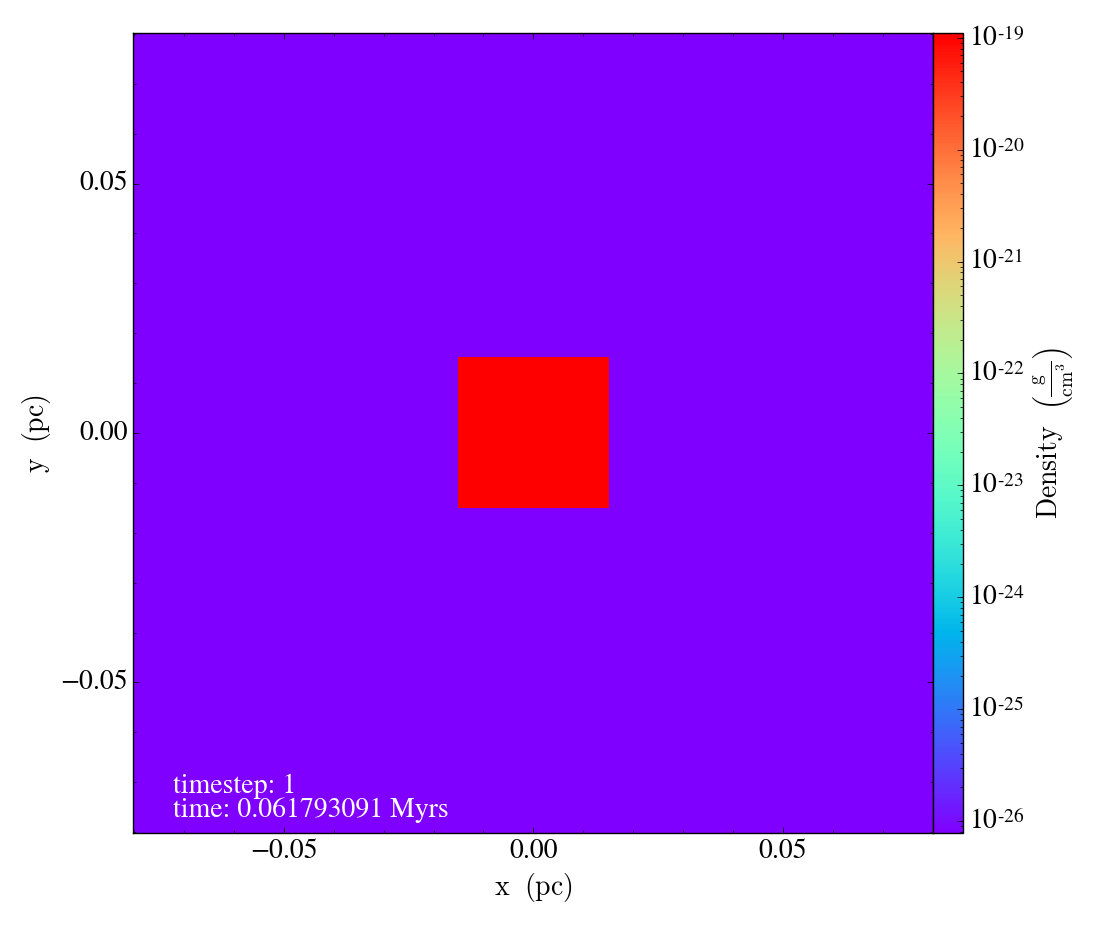

In [20]:
plot_time_slice("density",1)

In [34]:
timestep=2
physical_quantity="density"
ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
slc = yt.SlicePlot(ds, "z",physical_quantity)
slc.set_axes_unit('pc')
slc.set_cmap(physical_quantity,"rainbow")
slc.set_font_size(20)
slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
slc.annotate_velocity()
slc.annotate_particles((0.01, 'pc'))
slc.annotate_grids()
slc.show()

In [43]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [71]:
# id, mass (msol), x, y ,z, vx,vy,vz
sink_info = np.loadtxt("output_00002/sink_00002.info",comments="=",skiprows=4)

In [ ]:
#note that contrary to proj, you need slc.data_source.to_frb here where slc is SlicePlot and not Slice

well that sucks...

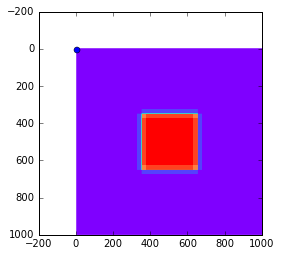

In [72]:
timestep=2
physical_quantity="density"
ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
# c = ds.find_max("density")[1]
# print c
#this center kinda off so lets just use this one ...
c= [0.5,0.5,0.5]
slc = yt.SlicePlot(ds, "z",physical_quantity)
width = (0.1, 'pc') 
res = [1000, 1000] 
frb = slc.data_source.to_frb(width, res, center=c) 
plt.figure()
plt.imshow(np.array(frb["density"]),cmap="rainbow")
plt.plot(sink_info[2],sink_info[3],'o')

not too sure what the units are, but now plotted with the centered proper units its still at corner, that means something is bad...

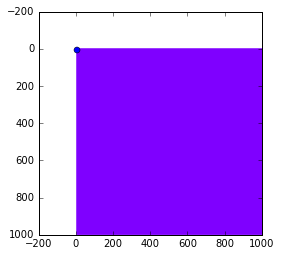

In [87]:
timestep=2
physical_quantity="density"
ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
c= [sink_info[2],sink_info[3],sink_info[4]]
slc = yt.SlicePlot(ds, "z",physical_quantity)
width = (0.1, 'pc') 
res = [1000, 1000] 
frb = slc.data_source.to_frb(width, res, center=c) 
plt.figure()
plt.imshow(np.array(frb["density"]),cmap="rainbow")
plt.plot(sink_info[2],sink_info[3],'o')

This doesn't make a lot of sense , go back and try to fiture out whether sink can be initialized by ic_part'

converting from code units to parsecs

In [88]:
c =np.array([sink_info[2],sink_info[3],sink_info[4]])
print c

[ 5.698271  5.698271  4.414062]


In [90]:
scale_l  = 49470000000000000.
print c*scale_l/ 3.08567758e18  , "parsecs"

[ 0.09135545  0.09135545  0.07076684] parsecs


Woah this is on the edge of the box!